## project 2

In [19]:
import pandas as pd
import numbers as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from collections import Counter
import seaborn as sns


In [20]:
# load data
data = pd.read_csv('destinations.csv')
data

,Destination,Region,Country,Category,Latitude,Longitude,Approximate Annual Tourists,Currency,Majority Religion,Famous Foods,...,Safety,Cultural Significance,Description,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,Rome,Lazio,Italy,City,41.902782,12.496366,14 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",...,"Generally safe, but watch out for pickpockets","The capital city, known for its historical lan...","A hub of ancient history and modern culture, w...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Florence,Tuscany,Italy,City,43.769581,11.255772,10 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",...,"Generally safe, but watch out for pickpockets","A Renaissance city famous for its art, archite...","Home to world-class museums, including the Uff...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Venice,Veneto,Italy,City,45.435559,12.336196,10 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",...,"Generally safe, but watch out for pickpockets","A unique city built on canals, known for its g...","An iconic city of water, renowned for romantic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Milan,Lombardy,Italy,City,45.464643,9.18854,7 million,Euro,Roman Catholic,"Risotto, Ossobuco, Panettone",...,"Generally safe, but watch out for pickpockets","A fashion capital known for its shopping, muse...","A modern city with an ancient soul, featuring ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Naples,Campania,Italy,City,40.85133,14.25472,5 million,Euro,Roman Catholic,"Pizza, Pasta, Cannoli",...,"Generally safe, but be aware of pickpockets","A vibrant city known for its delicious food, h...","Famous for pizza, Pompeii, and proximity to th...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Kopaonik,Central Serbia,Serbia,Mountain Range,43.575278,20.760556,"100,000",Serbian dinar (RSD),Serbian Orthodox,"cevapi, Pljeskavica, Sarma",...,Generally safe,"A popular ski resort area in the winter, offer...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,Novi Sad Fortress,Novi Sad,Serbia,Fortress,45.263333,19.846667,"50,000",Serbian dinar (RSD),Serbian Orthodox,"cevapi, Pljeskavica, Sarma",...,Generally safe,A historic fortress overlooking the Danube Riv...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,Sremski Karlovci,Vojvodina,Serbia,Town,45.263333,19.846667,"25,000",Serbian dinar (RSD),Serbian Orthodox,"cevapi, Pljeskavica, Sarma",...,Generally safe,"A historic town known for its vineyards, winer...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,Subotica,North Backa,Serbia,City,46.083333,18.966667,"20,000",Serbian dinar (RSD),Serbian Orthodox,"cevapi, Pljeskavica, Sarma",...,Generally safe,"A city on the border with Hungary, known for i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# split str and counting
cultural_str = data['Cultural Significance'].dropna().str.lower().str.split().sum()
word_counter = Counter(cultural_str)
word_freq_df = pd.DataFrame(word_counter.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency")

In [22]:
# split df
word_freq_df = pd.DataFrame(word_counter.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
word_freq_df['Word'] = word_freq_df['Word'].str.replace('[,\.]', '')

word_freq_df

C:\Users\82108\AppData\Local\Temp\ipykernel_16204\1766620750.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  word_freq_df['Word'] = word_freq_df['Word'].str.replace('[,\.]', '')


,Word,Frequency
11,and,188
4,for,159
3,known,139
5,its,101
13,a,95
...,...,...
317,shops,1
316,casinos,1
315,district,1
314,oceanographic,1


In [23]:
# Delete unnecessary values 

unnecessary = [
    'and', 'for', 'its', 'in', 'of', 'the', 'with', 'to', 'by', 'on', 
    'at', 'from', 'about', 'as', 'into', 'over', 'between', 'through', 
    'during', 'before', 'after', 'above', 'below', 'up', 'down', 
    'out', 'off', 'under', 'again', 'further', 'then', 'once', 'a', 'known', 
    'city'
]

filtered_word_freq_df = word_freq_df[~word_freq_df['Word'].isin(unnecessary)]
filtered_word_freq_df[filtered_word_freq_df['Frequency'] > 1]

,Word,Frequency
88,historic,42
57,beautiful,34
34,vibrant,25
191,town,24
32,museums,20
...,...,...
49,landscapes,2
197,river,2
31,shopping,2
40,group,2


### filtered_word_freq_df에서 상위 5개 키워드를 보면 
활기찬(49), 역사(42), 아름다운(34), 박물관(20), 해안(18) & 중세적(18) 순


In [44]:
keywords = filtered_word_freq_df.head(10)
keywords = pd.Series(keywords["Word"])

matching_destinations = data[data['Cultural Significance'].str.contains('|'.join(keywords), case=False, na=False)][['Destination', 'Country']]




# TF-IDF matrix
tfidf_matrix = tfidf_vec.fit_transform(data['Cultural Significance'])

# to df
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vec.get_feature_names_out( ), index=data["Country"])
country_top_keywords = tfidf_df.groupby('Country').mean().idxmax(axis=1).reset_index()
country_top_keywords.columns = ['Country', 'Top Keyword']
country_top_keywords


C:\Users\82108\AppData\Local\Temp\ipykernel_16204\3054951769.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = grouped_by_country["Country"], x = grouped_by_country["Count"], palette='cubehelix')


Text(0.5, 1.0, 'Countries matching the top 5 keywords')

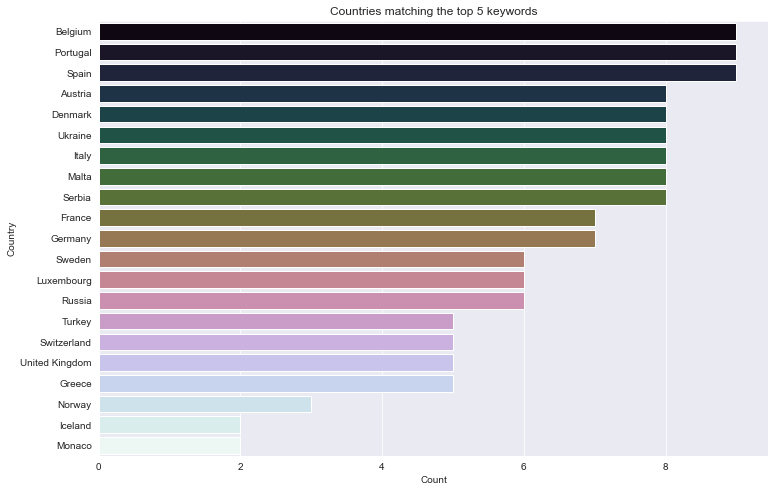

In [25]:
# groupby 
grouped_by_country = matching_destinations.groupby('Country')['Destination'].count().reset_index()
grouped_by_country.columns = ['Country', 'Count']
grouped_by_country = grouped_by_country.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
sns.barplot(y = grouped_by_country["Country"], x = grouped_by_country["Count"], palette='cubehelix')
plt.title('Countries matching the top 5 keywords', )


### TF-IDF 

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


data['Cultural Significance'] = data['Cultural Significance'].fillna('')
tfidf_vec = TfidfVectorizer(stop_words='english', max_features=100)

# TF-IDF matrix
tfidf_matrix = tfidf_vec.fit_transform(data['Cultural Significance'])

# to df
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vec.get_feature_names_out( ), index=data["Country"])
country_top_keywords = tfidf_df.groupby('Country').mean().idxmax(axis=1).reset_index()
country_top_keywords.columns = ['Country', 'Top Keyword']
country_top_keywords

,Country,Top Keyword
0,Austria,festivals
1,Belgium,historic
2,Country,significance
3,Denmark,famous
4,France,museum
5,Germany,city
6,Greece,beaches
7,Iceland,national
8,Italy,historical
9,Luxembourg,picturesque


In [39]:
tf = pd.read_csv("tf - Sheet1.csv")
tf.head()

,Destination,Region,Country,activities,ancient,architecture,art,arts,atmosphere,baroque,...,vibrant,views,villages,vineyards,walled,waters,wildlife,wine,winter,world
0,Rome,Lazio,Italy,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Florence,Tuscany,Italy,0.0,0.0,0.388209,0.617223,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Venice,Veneto,Italy,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Milan,Lombardy,Italy,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Naples,Campania,Italy,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.340099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
country_top_keywords = tf.groupby('Country').mean().idxmax(axis=1).reset_index()
country_top_keywords.columns = ['Country', 'Top Keyword']

country_top_keywords

,Country,Top Keyword
0,Austria,festivals
1,Belgium,historic
2,Denmark,famous
3,France,museum
4,Germany,city
5,Greece,beaches
6,Iceland,national
7,Italy,historical
8,Luxembourg,picturesque
9,Malta,town


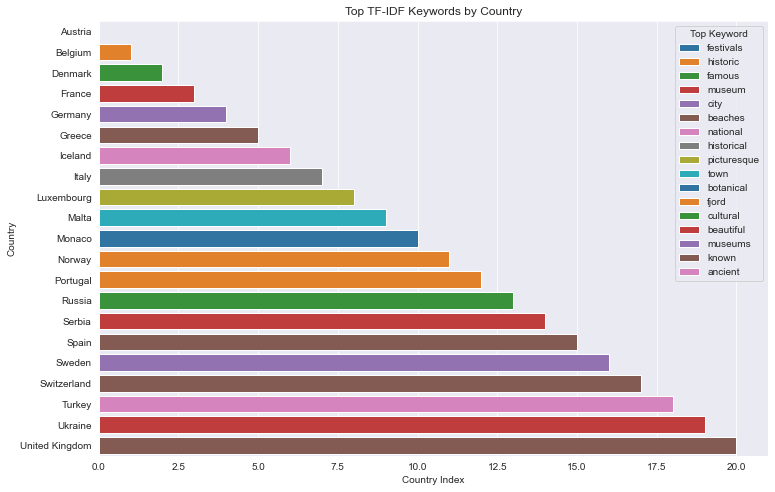

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(y=country_top_keywords['Country'], x=country_top_keywords.index, hue=country_top_keywords['Top Keyword'], dodge=False, palette='tab10')
plt.title('Top TF-IDF Keywords by Country')
plt.xlabel('Country Index')
plt.ylabel('Country')
plt.legend(title='Top Keyword')
plt.show()


In [79]:
df = data
df['Cultural Significance'] = df['Cultural Significance'].str.replace('known', '', case=False)
df['Cultural Significance'] = df['Cultural Significance'].str.replace('city', '', case=False)
df['Cultural Significance'] = df['Cultural Significance'].str.replace('beautiful', '', case=False)
df['Cultural Significance'] = df['Cultural Significance'].fillna('')

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100)


# TF-IDF 행렬 생성
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cultural Significance'])

# TF-IDF 행렬을 데이터프레임으로 변환
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vec.get_feature_names_out( ))


# to df
#tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vec.get_feature_names_out( ), index=df["Country"])
#country_top_keywords = tfidf_df.groupby('Country').mean().idxmax(axis=1).reset_index()
#country_top_keywords.columns = ['Country', 'Top Keyword']
#country_top_keywords




In [97]:

tfidf_df['Country'] = df['Country']

# 국가별 TF-IDF 평균 계산
country_tfidf_avg = tfidf_df.groupby('Country').mean()


,Country,Top Keyword
0,Austria,famous
1,Belgium,hiking
2,Country,coastal
3,Denmark,delicious
4,France,museum
5,Germany,museums
6,Greece,beautiful
7,Iceland,national
8,Italy,historic
9,Luxembourg,parks


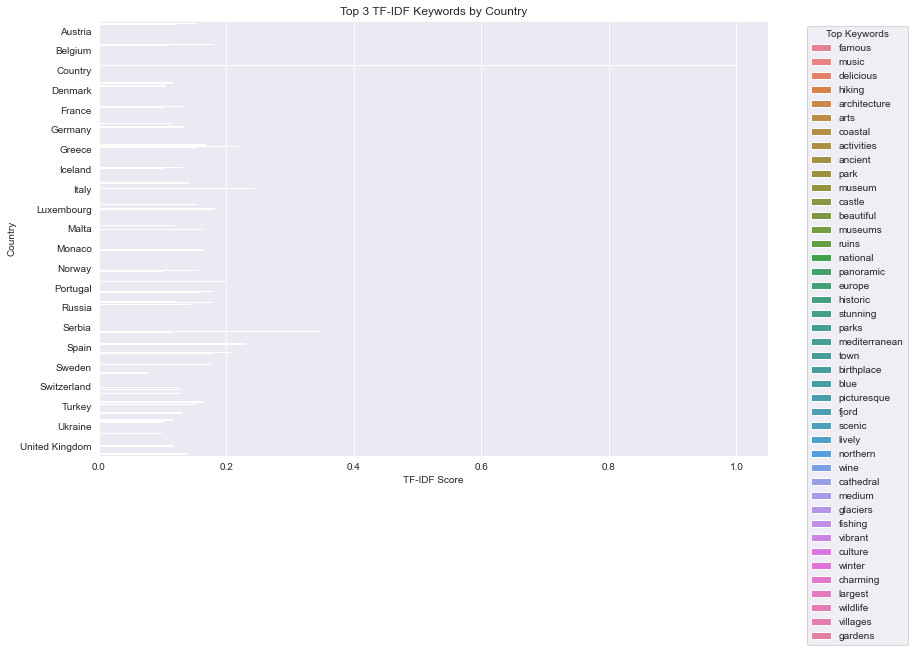

In [96]:
# 각 국가별로 TF-IDF 점수가 가장 높은 상위 3개 키워드를 시각화

# 상위 5개의 키워드만 선택
top_n = 3

# 국가별 상위 키워드 추출
top_keywords_by_country = country_tfidf_avg.apply(lambda x: x.nlargest(top_n).index.tolist(), axis=1).reset_index()
top_keywords_by_country.columns = ['Country', 'Top Keywords']

# 시각화를 위한 데이터 재구성
top_keywords_df = pd.DataFrame(top_keywords_by_country.explode('Top Keywords'))
top_keywords_df['TF-IDF'] = top_keywords_df.apply(lambda row: country_tfidf_avg.loc[row['Country'], row['Top Keywords']], axis=1)

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=top_keywords_df, y='Country', x='TF-IDF', hue='Top Keywords', dodge=True)
plt.title('Top 3 TF-IDF Keywords by Country')
plt.xlabel('TF-IDF Score')
plt.ylabel('Country')
plt.legend(title='Top Keywords', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [100]:
country_top_keywords = tfidf_df.groupby('Country').mean().idxmax(axis=1).reset_index()
country_top_keywords.columns = ['Country', 'Top Keyword']
country_top_keywords

,Country,Top Keyword
0,Austria,famous
1,Belgium,hiking
2,Country,coastal
3,Denmark,delicious
4,France,museum
5,Germany,museums
6,Greece,beautiful
7,Iceland,national
8,Italy,historic
9,Luxembourg,parks


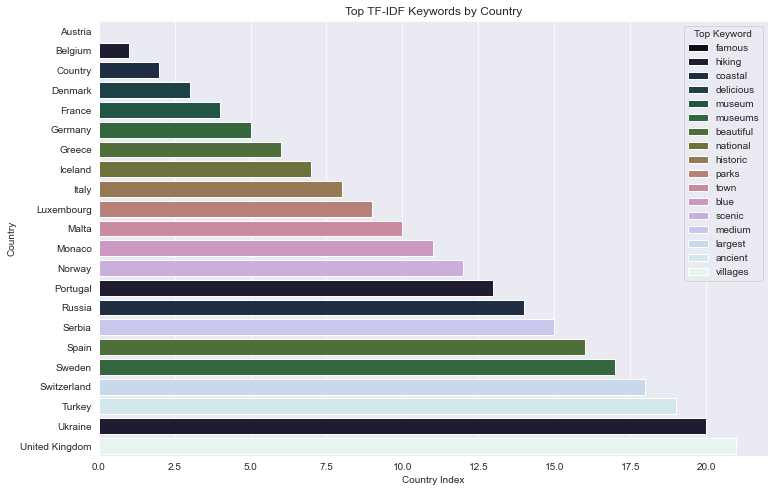

In [103]:
plt.figure(figsize=(12, 8))
sns.barplot(y=country_top_keywords['Country'], x=country_top_keywords.index , hue=country_top_keywords['Top Keyword'], dodge=False, palette='cubehelix')
plt.title('Top TF-IDF Keywords by Country')
plt.xlabel('Country Index')
plt.ylabel('Country')
plt.legend(title='Top Keyword')
plt.show()
